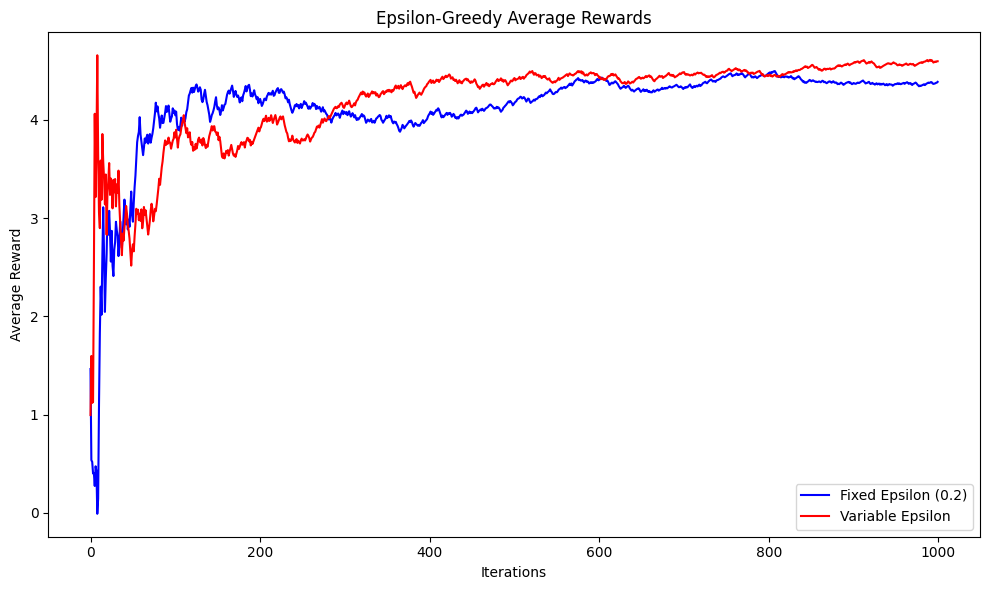

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def reward_button_1(): 
    return np.random.normal(1, 1)

def reward_button_2():  
    return np.random.normal(-1, 2)

def reward_button_3():
    return np.random.normal(-2, 1)

def reward_button_4(): 
    if np.random.rand() < 0.7:
        return np.random.normal(9, 2)
    else:
        return np.random.uniform(-9, 1)

def get_reward_functions():
    return [reward_button_1, reward_button_2, reward_button_3, reward_button_4]

def fixed_epsilon_strategy(t, epsilon=0.2):
    return epsilon

def variable_epsilon_strategy(t, epsilon_fixed=0.2, epsilon_min=0.01, T=1000):
    return max(epsilon_min, epsilon_fixed * (1 - t / T))

def epsilon_greedy(T, epsilon_strategy, reward_functions):
    num_actions = len(reward_functions)
    Q_values = np.zeros(num_actions)  
    action_counts = np.zeros(num_actions) 
    rewards = []

    for t in range(T):
        epsilon = epsilon_strategy(t)  
        if np.random.rand() < epsilon:  
            action = np.random.randint(0, num_actions)
        else:  # Exploitation
            action = np.argmax(Q_values)

        reward = reward_functions[action]() 
        rewards.append(reward)

        action_counts[action] += 1
        Q_values[action] += (reward - Q_values[action]) / action_counts[action]

    return rewards


def plot_results(rewards_fixed, rewards_variable, T):
    plt.figure(figsize=(10, 6))

    plt.plot(np.cumsum(rewards_fixed) / (np.arange(1, T + 1)), label="Fixed Epsilon (0.2)", color='blue')

    plt.plot(np.cumsum(rewards_variable) / (np.arange(1, T + 1)), label="Variable Epsilon", color='red')

    plt.title("Epsilon-Greedy Average Rewards")
    plt.xlabel("Iterations")
    plt.ylabel("Average Reward")

    plt.legend()

    plt.tight_layout()
    plt.show()


T = 1000  
epsilon_fixed = 0.2
epsilon_min = 0.01 

reward_functions = get_reward_functions()

fixed_strategy = lambda t: fixed_epsilon_strategy(t, epsilon_fixed)
variable_strategy = lambda t: variable_epsilon_strategy(t, epsilon_fixed, epsilon_min, T)

rewards_fixed = epsilon_greedy(T, fixed_strategy, reward_functions)
rewards_variable = epsilon_greedy(T, variable_strategy, reward_functions)

plot_results(rewards_fixed, rewards_variable, T)

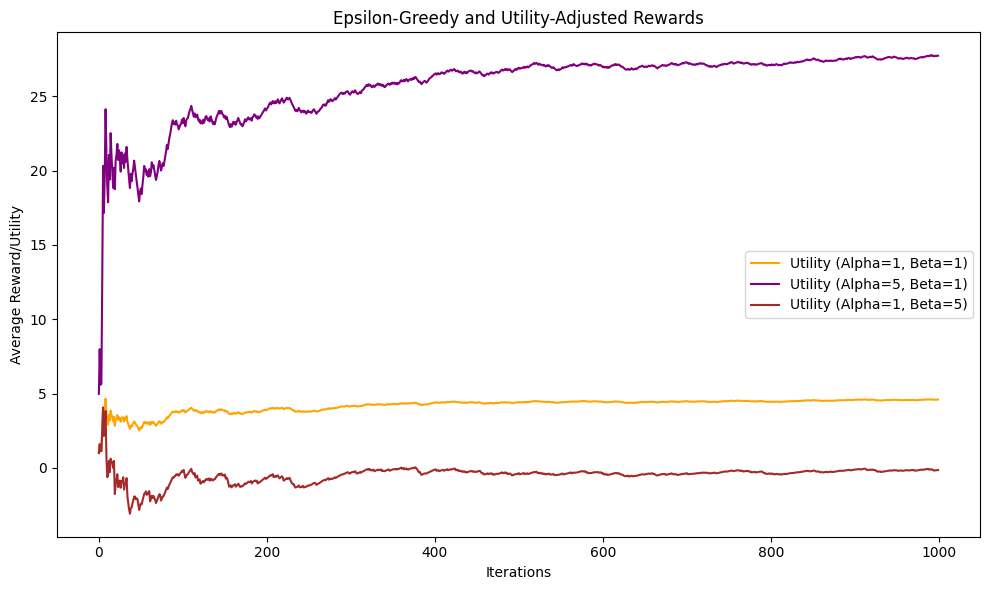

In [24]:
def utility(rewards, alpha, beta):
    return np.array([alpha * r if r >= 0 else beta * r for r in rewards])

def plot_utility_results(rewards_variable, alpha_beta_cases, T):
    plt.figure(figsize=(10, 6))

    colors = ['orange', 'purple', 'brown', 'pink']

    for i, (alpha, beta) in enumerate(alpha_beta_cases):
        utility_rewards_variable = utility(rewards_variable, alpha, beta)
        
        plt.plot(np.cumsum(utility_rewards_variable) / (np.arange(1, T + 1)), 
                 label=f"Utility (Alpha={alpha}, Beta={beta})", color=colors[i % len(colors)])

    plt.title("Epsilon-Greedy and Utility-Adjusted Rewards")
    plt.xlabel("Iterations")
    plt.ylabel("Average Reward/Utility")
    plt.legend()

    plt.tight_layout()
    plt.show()

alpha_beta_cases = [(1, 1), (5, 1), (1, 5)]  
T = 1000  
plot_utility_results(rewards_variable, alpha_beta_cases, T)